<a href="https://colab.research.google.com/github/jamshaid120/Disaster-Images-Dataset-CNN-Model/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin_Cancer_Detection using CNN

## The dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. The objective to build deep learning model to classify given query image into one of the 7 different classes of skin cancer.

#### Sourses:
Data: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

Here I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.
We will move step by step process to classify 7 classes of cancer.

![](https://github.com/charanhu/Skin_Cancer_Detection_MNIST/blob/main/model_architecture.png?raw=true)

In this kernel I have followed following 14 steps for model building and evaluation which are as follows :

Step 1: Importing Essential Libraries

Step 2: Loading data and Making labels

Step 3: Train Test Split

Step 4: Exploratory data analysis (EDA)

Step 5: Model Building (CNN)

Step 6: Setting Optimizer & Annealing

Step 7: Fitting the model

Step 8: Model Evaluation

# Downloading Dataset

In [8]:
#!/bin/bash
!curl -L -o skin-cancer-mnist-ham10000.zip\
  https://www.kaggle.com/api/v1/datasets/download/kmader/skin-cancer-mnist-ham10000

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 5324M  100 5324M    0     0  22.6M      0  0:03:55  0:03:55 --:--:-- 23.6M


# Step 1: Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [13]:
!unzip /content/skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [16]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

path='hmnist_28_28_RGB.csv'

In [17]:
df=pd.read_csv(path)

In [18]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [19]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [20]:
print(len(train_set))

8012


In [21]:
print(len(test_set))

2003


In [22]:
df.label.unique()

array([4, 6, 0, 1, 5, 3, 2])

In [23]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

    1:('bcc' , 'basal cell carcinoma'),

    2:('bkl', 'benign keratosis-like lesions'),

    3:('df', 'dermatofibroma'),

    4:('nv', ' melanocytic nevi'),

    5:('vasc', ' pyogenic granulomas and hemorrhage'),

    6:('mel', 'melanoma'),
}

In [24]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [25]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


# Step 4: Exploratory Data Analysis and Preprocessing

<Axes: ylabel='count'>

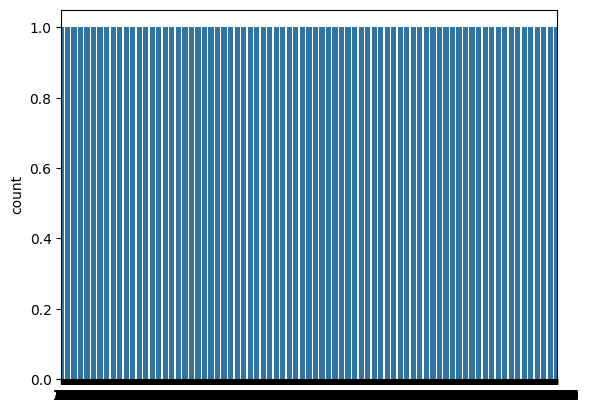

In [26]:
import seaborn as sns

sns.countplot(train_set['label'])

In [27]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

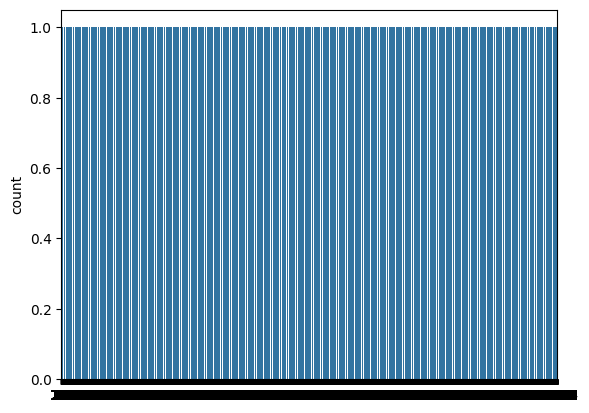

In [28]:
sns.countplot(y_train)

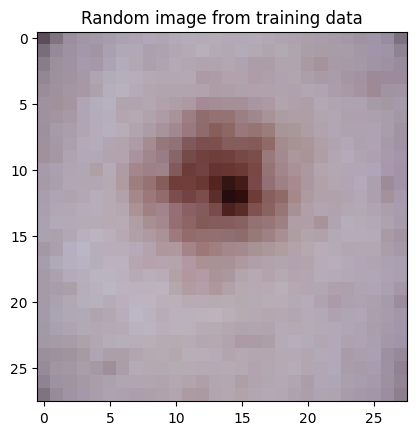

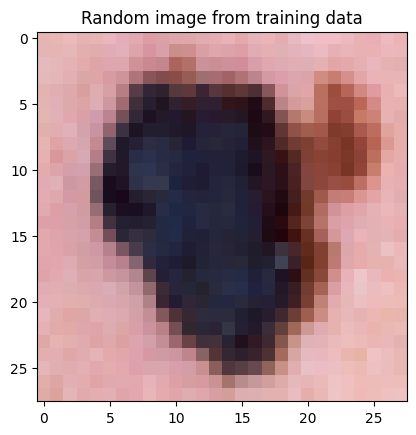

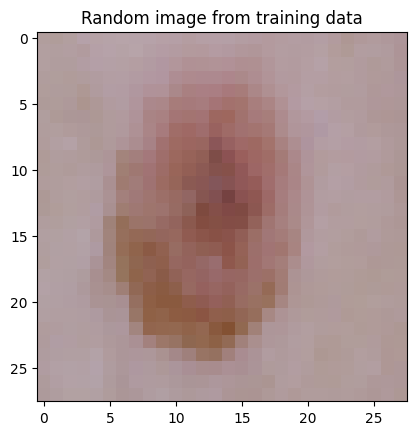

In [29]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [31]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           23

 Total params: 504,103 (1.92 MB)

 Trainable params: 502,983 (1.92 MB)

 Non-trainable params: 1,120 (4.38 KB)

# Step 6: Setting Optimizer & Annealing

---



In [39]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_accuracy',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [40]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.5 µs


# Step 7: Fitting the model

In [41]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9866 - loss: 0.0421
Epoch 1: val_accuracy improved from -inf to 0.80029, saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9866 - loss: 0.0421 - val_accuracy: 0.8003 - val_loss: 0.6699
Epoch 2/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9898 - loss: 0.0335
Epoch 2: val_accuracy did not improve from 0.80029
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.6741 - val_loss: 1.1663
Epoch 3/20
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9879 - loss: 0.0344
Epoch 3: val_accuracy improved from 0.80029 to 0.93663, saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9879 - loss: 0.0343 - val_accuracy: 0.9366 - val_loss: 0.1755
Epoch 4/20
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.0331
Epoch 4: val_accuracy did not improve from 0.93663
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.8961 - val_loss: 0.2507
Epoch 5/20
228/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9900 - loss: 0.0342
Epoch 5: val_accuracy improved from 0.93663 to 0.97332, saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9900 - loss: 0.0340 - val_accuracy: 0.9733 - val_loss: 0.0887
Epoch 6/20
228/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9936 - loss: 0.0181
Epoch 6: val_accuracy did not improve from 0.97332
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9936 - loss: 0.0182 - val_accuracy: 0.8523 - val_loss: 0.3915
Epoch 7/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0202
Epoch 7: val_accuracy did not improve from 0.97332
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9602 - val_loss: 0.1040
Epoch 8/20
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0202
Epoch 8: val_accuracy did not improve from 0.97332
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9480 - val_loss: 0.1334
Epoch 9/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 9: val_accuracy did not impro

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9915 - loss: 0.0304 - val_accuracy: 0.9959 - val_loss: 0.0194
Epoch 11/20
229/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9915 - loss: 0.0259
Epoch 11: val_accuracy did not improve from 0.99586
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9913 - val_loss: 0.0305
Epoch 12/20
226/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9961 - loss: 0.0128
Epoch 12: val_accuracy did not improve from 0.99586
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9055 - val_loss: 0.3252
Epoch 13/20
226/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9928 - loss: 0.0234
Epoch 13: val_accuracy did not improve from 0.99586
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9928 - loss: 0.0235 - val_accuracy: 0.9741 - val_loss: 0.0660
Epoch 14/20
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9899 - loss: 0.0346
Epoch 14: val_accuracy did n

# Step 8: Model Evaluation

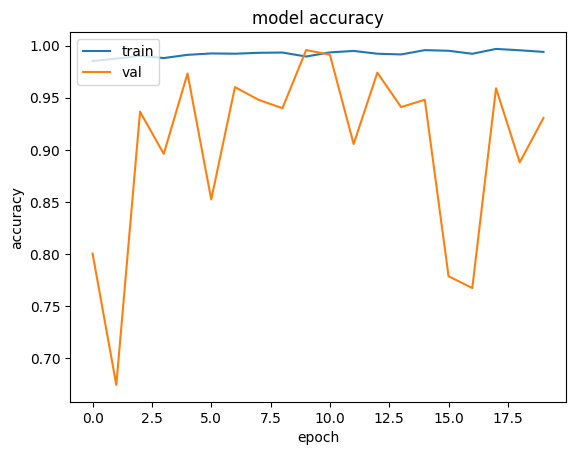

In [42]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

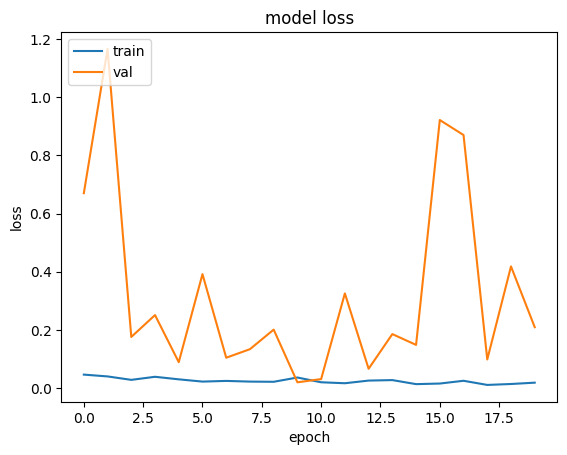

In [43]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [44]:
model.load_weights('best_model.h5')

In [45]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 3s - 46ms/step - accuracy: 0.7269 - loss: 1.3932


In [46]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [47]:
print(conf_mat)

[[  14   24    7    0    8    0    9]
 [   6   63   10    0    6    0    7]
 [   9   22   99    0   47    1   44]
 [   6    5    2    4    5    0    2]
 [   4   47   59    1 1146    0   94]
 [   0    4    0    0    8   21    1]
 [   4    7   18    0   78    2  109]]


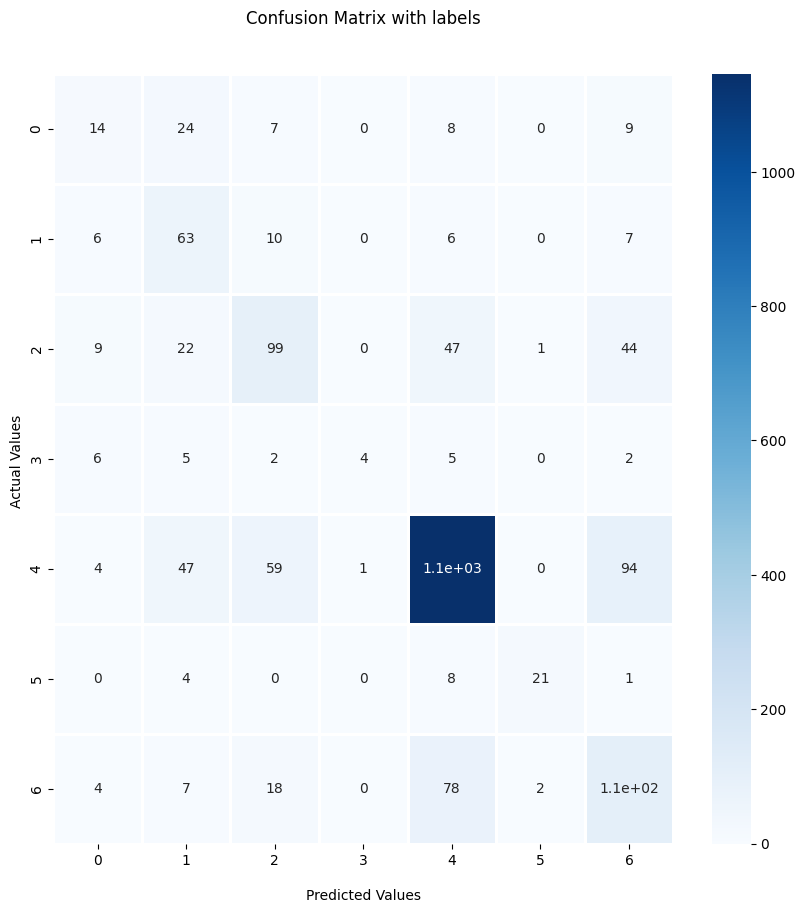

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

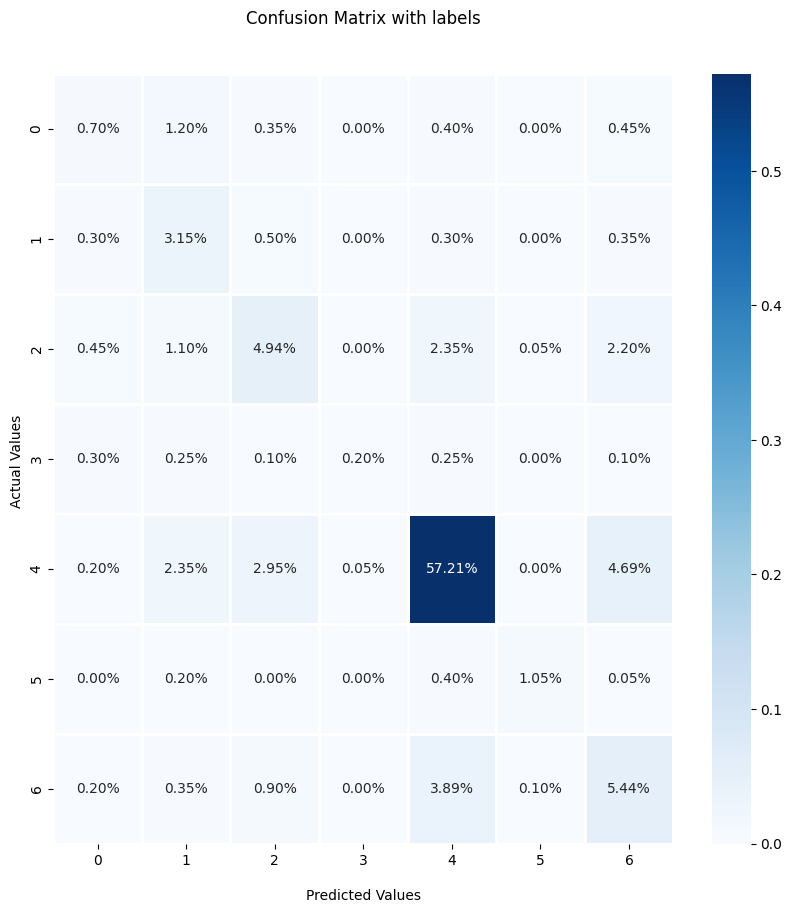

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [51]:
#https://pillow.readthedocs.io/en/stable/

import PIL

image=PIL.Image.open('/content/HAM10000_images_part_1/ISIC_0024306.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[9.3828194e-06 1.0284943e-05 3.5369954e-05 2.1221667e-06 9.9977809e-01
 3.3815199e-05 1.3082213e-04]
('nv', ' melanocytic nevi')
